# Dataset Utils

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from util.dataset_util import get_data_from_csv
from util.plots_util import plot_heatmap

## Visualization

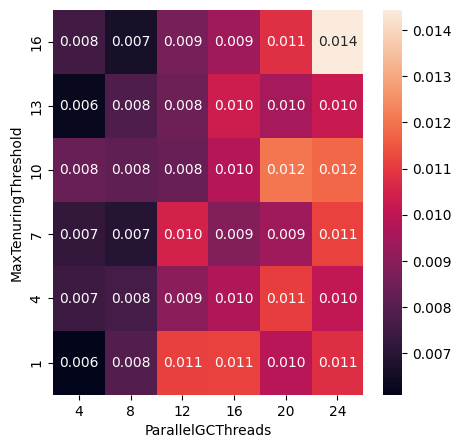

In [3]:
target_goal = "avgGCPause"

df = pd.read_csv("datasets/ext_avrora_real_saved_states.csv")
x = df.iloc[:, 0].values
y = df.iloc[:, 1].values
z = df.iloc[:, 2].values
# x, y, z = get_data_from_csv(
#     csv_dir= "summaries_avrora", 
#     goal = target_goal)

plot_heatmap(x, y, z)

# avrora_df = pd.DataFrame({
#     "ParallelGCThreads": x,
#     "MaxTenuringThreshold": y,
#     "Average GC Pause": z,
# })
# avrora_df.to_csv("avrora_real_saved_states.csv", index=False)
## Default values (avrora)
# x.append(15)
# y.append(16)
# z.append(0.01106)

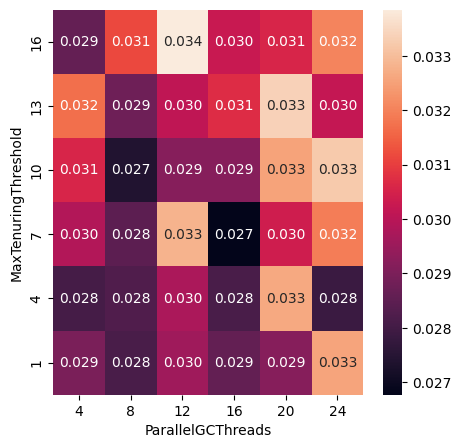

In [4]:
target_goal = "avgGCPause"

df = pd.read_csv("datasets/ext_kafka_real_saved_states.csv")
x = df.iloc[:, 0].values
y = df.iloc[:, 1].values
z = df.iloc[:, 2].values
# x, y, z = get_data_from_csv(
#     csv_dir= "summaries_kafka", 
#     goal = target_goal)

plot_heatmap(x, y, z)

# kafka_df = pd.DataFrame({
#     "ParallelGCThreads": x,
#     "MaxTenuringThreshold": y,
#     "Average GC Pause": z,
# })
# kafka_df.to_csv("kafka_real_saved_states.csv", index=False)

## Create a synthetic dataset

Многоэкстремальная двумерная функция, построена как сумма N гиперболических потенциалов.

http://conf.nsc.ru/files/conferences/Lyap-100/fulltext/72212/84279/%D0%9A%D1%83%D0%B7%D0%BD%D0%B5%D1%86%D0%BE%D0%B2_%D0%90%D0%92_%D0%A0%D1%83%D0%B1%D0%B0%D0%BD_%D0%90%D0%98_%D0%90%D0%BB%D0%B3.pdf

### Synthetic dataset 1

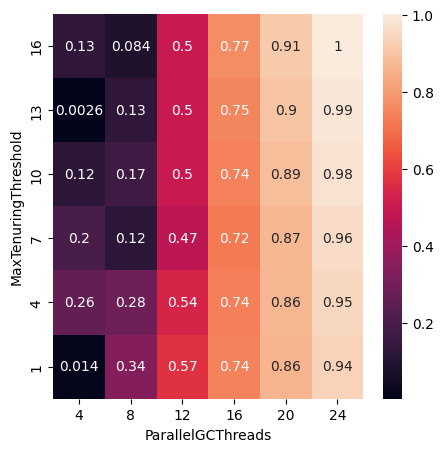

In [4]:
def z_1(x, y):
    return - 1 / (0.1*abs(x - 4)**0.9 + 0.1*abs(y - 1)**1.5 + 0.37)

# def z_2(x, y):
#     return - 1 / (0.1*abs(x - 4)**0.9 + 0.1*abs(y - 4)**1.5 + 0.45)

def z_2(x, y):
    return - 1 / (0.03*abs(x - 8)**1.5 + 0.03*abs(y - 7)**1.5 + 0.45)

def z_3(x, y):
    return - 1 / (0.05*abs(x - 4)**1.5 + 0.02*abs(y - 13)**1.5 + 0.4)

def z_5(x, y):
    return - 1 / (0.03*abs(x - 8)**1.5 + 0.03*abs(y - 16)**1.5 + 0.4)

def func(x, y):
    return z_1(x, y) + z_2(x, y) + z_3(x, y) + z_5(x, y)

new_z = []
new_x = []
new_y = []

for i in range(4, 24 + 1, 4):
    for j in range(1, 16 + 1, 3):
        new_x.append(i)
        new_y.append(j)
        new_z.append(func(int(i), int(j)))

# Normalize
max_z = max(new_z)
min_z = min(new_z)
new_z = [(each - min_z  + 0.01)/  (max_z - min_z) for each in new_z]

fig, ax = plt.subplots(figsize=(5, 5))

curve_data = pd.DataFrame({'ParallelGCThreads': new_x, 'MaxTenuringThreshold': new_y, 'Average GC Pause': new_z})
curve_data['MaxTenuringThreshold'] = curve_data['MaxTenuringThreshold'].astype(int)
curve_data['ParallelGCThreads'] = curve_data['ParallelGCThreads'].astype(int)
curve_data_pivoted = curve_data.pivot(index="ParallelGCThreads", columns="MaxTenuringThreshold", values="Average GC Pause")
curve_data_pivoted = curve_data_pivoted.transpose()

ax = sns.heatmap(curve_data_pivoted,  ax=ax, annot=True, fmt=".2g") # annot=True, fmt=""
ax.invert_yaxis()
plt.show()

curve_data.to_csv("avrora_synthetic_saved_states.csv", index=False)

### Synthetic dataset 2

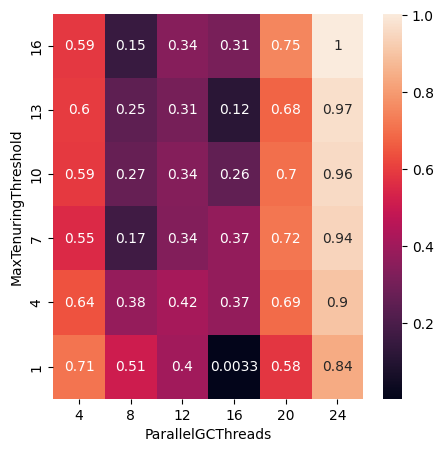

In [5]:
def z_1(x, y):
    return - 1 / (0.1*abs(x - 16)**0.9 + 0.1*abs(y - 1)**1.5 + 0.37)

# def z_2(x, y):
#     return - 1 / (0.1*abs(x - 4)**0.9 + 0.1*abs(y - 4)**1.5 + 0.45)

def z_2(x, y):
    return - 1 / (0.03*abs(x - 8)**1.5 + 0.03*abs(y - 7)**1.5 + 0.45)

def z_3(x, y):
    return - 1 / (0.05*abs(x - 16)**1.5 + 0.02*abs(y - 13)**1.5 + 0.4)

def z_5(x, y):
    return - 1 / (0.03*abs(x - 8)**1.5 + 0.03*abs(y - 16)**1.5 + 0.4)

def func(x, y):
    return z_1(x, y) + z_2(x, y) + z_3(x, y) + z_5(x, y)

new_z = []
new_x = []
new_y = []

for i in range(4, 24 + 1, 4):
    for j in range(1, 16 + 1, 3):
        new_x.append(i)
        new_y.append(j)
        new_z.append(func(int(i), int(j)))

# Normalize
max_z = max(new_z)
min_z = min(new_z)
new_z = [(each - min_z  + 0.01)/  (max_z - min_z) for each in new_z]

fig, ax = plt.subplots(figsize=(5, 5))

curve_data = pd.DataFrame({'ParallelGCThreads': new_x, 'MaxTenuringThreshold': new_y, 'Average GC Pause': new_z})
curve_data['MaxTenuringThreshold'] = curve_data['MaxTenuringThreshold'].astype(int)
curve_data['ParallelGCThreads'] = curve_data['ParallelGCThreads'].astype(int)
curve_data_pivoted = curve_data.pivot(index="ParallelGCThreads", columns="MaxTenuringThreshold", values="Average GC Pause")
curve_data_pivoted = curve_data_pivoted.transpose()

ax = sns.heatmap(curve_data_pivoted,  ax=ax, annot=True, fmt=".2g") # annot=True, fmt=""
ax.invert_yaxis()
plt.show()

curve_data.to_csv("kafka_synthetic_saved_states.csv", index=False)

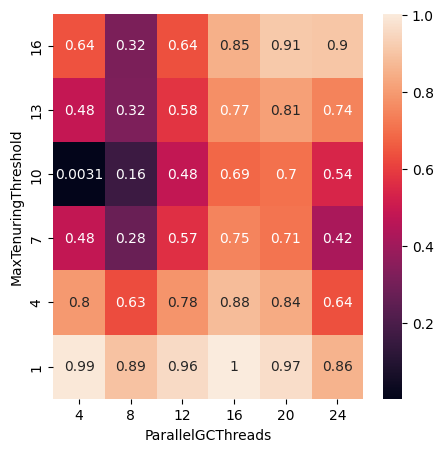

In [9]:
def z_1(x, y):
    return - 1 / (0.1*abs(x - 4)**0.9 + 0.1*abs(y - 10)**1.5 + 0.37)

# def z_2(x, y):
#     return - 1 / (0.1*abs(x - 4)**0.9 + 0.1*abs(y - 4)**1.5 + 0.45)

def z_2(x, y):
    return - 1 / (0.03*abs(x - 8)**1.5 + 0.03*abs(y - 7)**1.5 + 0.45)

def z_3(x, y):
    return - 1 / (0.05*abs(x - 24)**1.5 + 0.02*abs(y - 7)**1.5 + 0.4)

def z_5(x, y):
    return - 1 / (0.03*abs(x - 8)**1.5 + 0.03*abs(y - 16)**1.5 + 0.4)

def func(x, y):
    return z_1(x, y) + z_2(x, y) + z_3(x, y) + z_5(x, y)

new_z = []
new_x = []
new_y = []

for i in range(4, 24 + 1, 4):
    for j in range(1, 16 + 1, 3):
        new_x.append(i)
        new_y.append(j)
        new_z.append(func(int(i), int(j)))

# Normalize
max_z = max(new_z)
min_z = min(new_z)
new_z = [(each - min_z  + 0.01)/  (max_z - min_z) for each in new_z]

fig, ax = plt.subplots(figsize=(5, 5))

curve_data = pd.DataFrame({'ParallelGCThreads': new_x, 'MaxTenuringThreshold': new_y, 'Average GC Pause': new_z})
curve_data['MaxTenuringThreshold'] = curve_data['MaxTenuringThreshold'].astype(int)
curve_data['ParallelGCThreads'] = curve_data['ParallelGCThreads'].astype(int)
curve_data_pivoted = curve_data.pivot(index="ParallelGCThreads", columns="MaxTenuringThreshold", values="Average GC Pause")
curve_data_pivoted = curve_data_pivoted.transpose()

ax = sns.heatmap(curve_data_pivoted,  ax=ax, annot=True, fmt=".2g") # annot=True, fmt=""
ax.invert_yaxis()
plt.show()

curve_data.to_csv("test_synthetic_saved_states.csv", index=False)

# External Info

In [5]:
# goals = ["avgGCPause", "totalTenuredUsedMax", "avgPause", "freedMemoryByFullGC", "avgPromotion"]
goals = [
    "avgGCPause", 
    "avgPromotion", 
    "promotionTotal", 
    "totalHeapUsedMaxpc", 
    "totalHeapUsedMax", 
    "totalYoungUsedMax", 
    "totalYoungUsedMaxpc", 
    "totalTenuredUsedMax",
]

In [7]:
bm = "avrora"

x, y, z =  get_data_from_csv(f"summaries_{bm}", goals)

df = pd.DataFrame({
    "MaxTenuringThreshold": y,
    "ParallelGCThreads": x,
})
df[goals] = z
display(df[:5])
# df.to_csv(f"datasets/ext_{bm}_real_saved_states.csv", index=False)

,MaxTenuringThreshold,ParallelGCThreads,avgGCPause,avgPromotion,promotionTotal,totalHeapUsedMaxpc,totalHeapUsedMax,totalYoungUsedMax,totalYoungUsedMaxpc,totalTenuredUsedMax
0,10,20,0.01203,-439501.0,-2197504.0,5.6,1832.0,1828.775,16.9,4747.0
1,10,16,0.00983,-306176.0,-1530880.0,6.1,1993.0,1990.138,18.4,4773.0
2,7,24,0.01115,-419430.0,-2097152.0,6.1,1993.0,1990.138,18.4,4724.0
3,16,8,0.00665,-280576.0,-1402880.0,5.6,1832.0,1828.775,16.9,4720.0
4,1,20,0.00989,-270541.0,-1352704.0,6.1,1993.0,1990.138,18.4,4800.0


In [8]:
bm = "kafka"

x, y, z =  get_data_from_csv(f"summaries_{bm}", goals)

df = pd.DataFrame({
    "MaxTenuringThreshold": y,
    "ParallelGCThreads": x,
})
df[goals] = z
display(df[:5])
# df.to_csv(f"datasets/ext_{bm}_real_saved_states.csv", index=False)

,MaxTenuringThreshold,ParallelGCThreads,avgGCPause,avgPromotion,promotionTotal,totalHeapUsedMaxpc,totalHeapUsedMax,totalYoungUsedMax,totalYoungUsedMaxpc,totalTenuredUsedMax
0,10,12,0.02917,18.142,126.997,21.7,7096.0,6942.777,64.0,166.521
1,10,8,0.02740,17.913,125.389,22.6,7382.0,7228.855,66.7,166.475
2,7,20,0.03037,18.347,128.429,21.8,7133.0,6980.122,64.4,166.423
3,10,4,0.03058,18.038,126.269,22.7,7429.0,7276.107,67.1,166.504
4,10,24,0.03323,18.145,127.018,22.7,7428.0,7274.998,67.1,166.503


In [3]:
from env.PyEnvironmentsTest import JVMEnv

env_args = {
    "jdk_path": "jdk-11.0.20.1.jdk",
    "bm_path": "dacapo-bench.jar",
    "gc_viewer_jar": "gcviewer-1.36.jar",
    "callback_path": "callback/VMStatCallback.java",
    "n": 5,
    "goal": "avgGCPause",
    "verbose": False,
}

env = JVMEnv(bm_name="avrora", **env_args)

Successfully initialized a JVM Environment!
 JDK: jdk-11.0.20.1.jdk/bin,
 Benchmark: avrora (dacapo-bench.jar),
 Number of iterations: 5,
 Goal: avgGCPause,
 Number of JVM options: 2,
 JVM options: {'MaxTenuringThreshold': {'min': 1, 'max': 16}, 'ParallelGCThreads': {'min': 4, 'max': 24}},
 Env. default state: [7, 12, 0.01047, 4777.0, 0.05264, 3072.0, -329318.0],
 Env. default goal value: 0.01047,



In [4]:
env.reset()

TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([ 7.00000e+00,  1.20000e+01,  1.04700e-02,  4.77700e+03,
        5.26400e-02,  3.07200e+03, -3.29318e+05], dtype=float32),
 'reward': array(0., dtype=float32),
 'step_type': array(0, dtype=int32)})

In [14]:
env.step(1)

TimeStep(
{'discount': array(0.5, dtype=float32),
 'observation': array([ 1.00000e+01,  1.20000e+01,  8.32000e-03,  4.72000e+03,
        5.03200e-02,  3.07200e+03, -3.96902e+05], dtype=float32),
 'reward': array(0.2053, dtype=float32),
 'step_type': array(1, dtype=int32)})

In [15]:
env._perf_states

{0: {'args': [7, 12],
  'goal': 0.01047,
  'extra': [4777.0, 0.05264, 3072.0, -329318.0],
  'count': 1},
 1: {'args': [10, 12],
  'goal': 0.00832,
  'extra': [4720.0, 0.05032, 3072.0, -396902.0],
  'count': 3},
 2: {'args': [4, 12],
  'goal': 0.009,
  'extra': [4804.0, 0.05416, 3072.0, -382566.0],
  'count': 2}}

In [8]:
env._state[2]

0.00832